# Movie Lens EDA

---

Memphis Anzhe Meng

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

## Movies

In [ ]:
# Load movies
movies = pd.read_csv("../data/movies.csv", header=0)
movies = movies.replace({np.nan: None}) # replace NaN with None
movies.head()

,id,title,tagline,description,genres,keywords,date,collection,runtime,revenue,budget,director,cast,production_companies,production_countries,popularity,average_vote,num_votes,language,imdb_id,poster_url
0,862,Toy Story,None,"Led by Woody, Andy's toys live happily in his ...","animation, comedy, family","jealousy, toy, boy, friendship, friends, rival...",1995-10-30,Toy Story Collection,81,3.73554e+08,30000000,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",Pixar Animation Studios,United States of America,21.9469,7.7,5415,en,tt0114709,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1,8844,Jumanji,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,"adventure, fantasy, family","board game, disappearance, based on children's...",1995-12-15,None,104,2.62797e+08,65000000,Joe Johnston,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","TriStar Pictures, Teitler Film, Interscope Com...",United States of America,17.0155,6.9,2413,en,tt0113497,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,"romance, comedy","fishing, best friend, duringcreditsstinger, ol...",1995-12-22,Grumpy Old Men Collection,101,0,0,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","Warner Bros., Lancaster Gate",United States of America,11.7129,6.5,92,en,tt0113228,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...","comedy, drama, romance","based on novel, interracial relationship, sing...",1995-12-22,None,127,8.14522e+07,16000000,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...",Twentieth Century Fox Film Corporation,United States of America,3.85949,6.1,34,en,tt0114885,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,comedy,"baby, midlife crisis, confidence, aging, daugh...",1995-02-10,Father of the Bride Collection,106,7.65789e+07,0,Charles Shyer,"Steve Martin, Diane Keaton, Martin Short, Kimb...","Sandollar Productions, Touchstone Pictures",United States of America,8.38752,5.7,173,en,tt0113041,/e64sOI48hQXyru7naBFyssKFxVd.jpg


In [ ]:
# Total
print (f"{len(movies)} movies in total.")

46628 movies in total.


total of 20 unique genres from 91015 occurances.


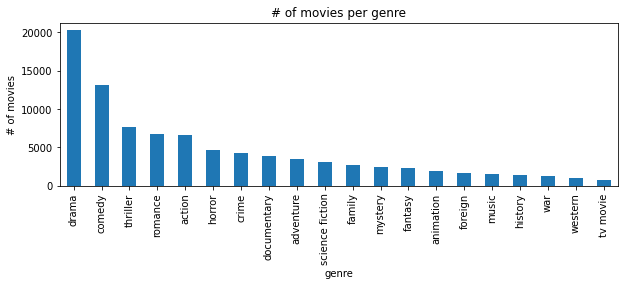

In [ ]:
# Genres
all_genres = [s.split(", ") for s in movies[movies.genres.notnull()].genres]
genres = [item for l in all_genres for item in l ]
unique_genres = set(genres)
print (f"total of {len(unique_genres)} unique genres from {len(genres)} occurances.")
pd.Series(genres).value_counts().plot(kind='bar', figsize=(10, 3))
plt.title("# of movies per genre")
plt.ylabel("# of movies")
plt.xlabel("genre")
plt.show()

In [ ]:
def get_year(date):
    year = None
    if date:
        year = date[:4]
    return year

In [ ]:
# Year (example of basic feature engineering)
movies['year'] = movies.date.apply(get_year) # same as movies.date.apply(lambda date: get_year(date))

Total of 135 uinque years from 1874 to 2020


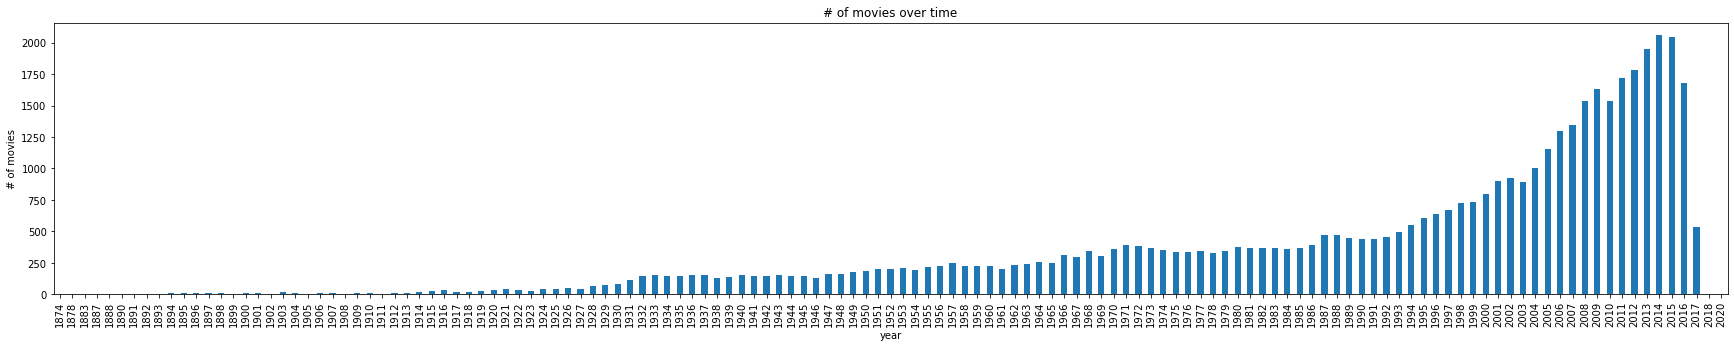

In [ ]:
# Years
years = movies[movies.year.notnull()].year # get rows where year is not None
print (f"Total of {len(set(years))} uinque years from {min(years)} to {max(years)}")
pd.Series(years).value_counts().sort_index().plot(kind='bar', figsize=(30, 5))
plt.title("# of movies over time")
plt.ylabel("# of movies")
plt.xlabel("year")
plt.show()

In [ ]:
# Sort by popularity
sorted_by_popularity = movies.sort_values(by='popularity', ascending=False)
print ("Most popular movies:\n", sorted_by_popularity['title'].values[:10])

Most popular movies:
 ['Minions' 'Wonder Woman' 'Beauty and the Beast' 'Baby Driver'
 'Big Hero 6' 'Deadpool' 'Guardians of the Galaxy Vol. 2' 'Avatar'
 'John Wick' 'Gone Girl']


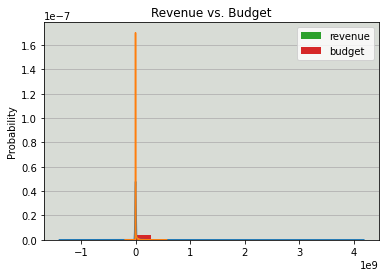

In [ ]:
# Revenue & Budget
fig, ax = plt.subplots()
movies[['revenue', 'budget']].plot.kde(ax=ax, legend=False, title='Revenue vs. Budget')
movies[['revenue', 'budget']].plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

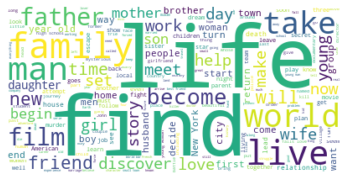

In [ ]:
# description
stopwords = set(STOPWORDS)
stopwords.update(['one', 'two'])
text = " ".join(review for review in movies[movies.description.notnull()].description)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

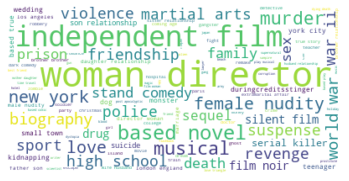

In [ ]:
# keywords
stopwords = set(STOPWORDS)
stopwords.update(['one', 'two'])
text = " ".join(review for review in movies[movies.keywords.notnull()].keywords)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# production countries
all_countries = [s.split(", ") for s in movies[movies.production_countries.notnull()].production_countries]
countries = [country for l in all_countries for country in l ]
unique_countries = set(countries)

country_dict = {}
for country in countries:
  if country in country_dict:
    country_dict[country] += 1
  else:
    country_dict[country] = 1

country_dict['Others'] = 0
for k in country_dict.keys():
  if country_dict[k] < 4000:
    country_dict['Others'] += country_dict[k]

delete = [key for key in country_dict if country_dict[key] < 4000]
for key in delete:
  del country_dict[key]  

In [ ]:
country_dict

{'France': 4079,
 'Others': 20986,
 'United Kingdom': 4186,
 'United States of America': 21484}

([<matplotlib.patches.Wedge at 0x7f2c95bbbd68>,
 [Text(0.26197777102361525, 1.0683480928468485, 'United States of America'),
  Text(-1.0730675736415471, 0.24192143848580897, 'United Kingdom'),
  Text(-1.0540554191612357, -0.3145904851339783, 'France'),
  Text(0.29479260282967173, -1.0597628608877119, 'Others')])

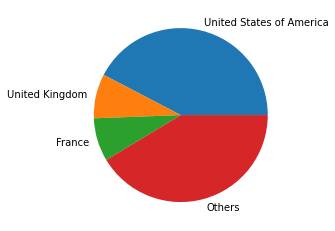

In [ ]:
plt.pie(country_dict.values(), labels=country_dict.keys())

## Rating

In [ ]:
# Load ratings
ratings = pd.read_csv("/content/drive/My Drive/Colab Notebooks/The Movies Dataset/ratings_small.csv", header=0)
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


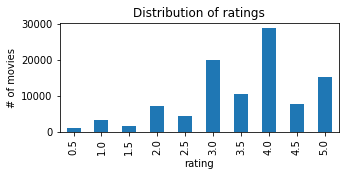

In [ ]:
# Distribution of ratings
print (ratings['rating'].describe())
pd.Series(ratings['rating']).value_counts().sort_index().plot(kind='bar', figsize=(5, 2))
plt.title("Distribution of ratings")
plt.ylabel("# of movies")
plt.xlabel("rating")
plt.show()

In [ ]:
sorted_by_users = ratings.groupby('userId')['movieId'].count().sort_values(ascending=False)
print ("Most active users:\n", sorted_by_users.values[:10])

Most active users:
 [2391 1868 1735 1700 1610 1340 1291 1063 1019 1011]


In [ ]:
sorted_by_movies = ratings.groupby('movieId')['userId'].count().sort_values(ascending=False)
print ("Most rated movies:\n", sorted_by_movies.values[:10])

Most rated movies:
 [341 324 311 304 291 274 259 247 244 237]


# Recommendation System

---

## Collaborative Filtering

In [ ]:
user_movie_content = pd.DataFrame(columns=[_ for _ in movies.id.unique()], index=[_ for _ in ratings.userId.unique()])
user_movie_content = user_movie_content.replace({np.nan: 0})

In [ ]:
for i in range(ratings.shape[0]):
  user_movie_content.iloc[int(ratings.iloc[i]['userId'])-1][int(ratings.iloc[i]['movieId'])] = ratings.iloc[i]['rating']

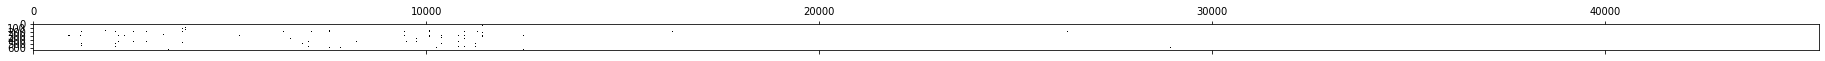

In [ ]:
fig = plt.figure(figsize=(32,32))
plt.spy(user_movie_content)

In [ ]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8MB 257kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670922 sha256=5d9eee2ce4a8b329c93dca38d0ec66f428b6ac78cfdb4dd14bcde8642b6cedd8
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [ ]:
from surprise import SVD
from surprise import SVDpp
from surprise import KNNBasic
from surprise import NMF
from surprise import CoClustering
from surprise import SlopeOne
from surprise.model_selection import cross_validate


algo1 = SVD()
algo2 = KNNBasic()
algo3 = NMF()
algo4 = CoClustering()
algo5 = SlopeOne()

# Run 5-fold cross-validation and print results
algo1_dict = cross_validate(algo1, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo2_dict = cross_validate(algo2, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo3_dict = cross_validate(algo3, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo4_dict = cross_validate(algo4, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo5_dict = cross_validate(algo5, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


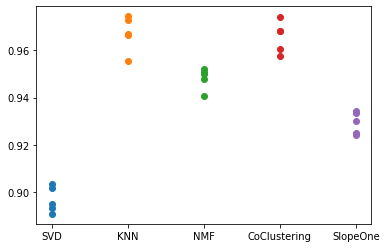

In [ ]:
import matplotlib.pyplot as plt

algos = ['SVD', 'KNN', 'NMF', 'CoClustering', 'SlopeOne']
x_pos = np.arange(float(len(algos)))

Y = [algo1_dict['test_rmse'], algo2_dict['test_rmse'], algo3_dict['test_rmse'], algo4_dict['test_rmse'], algo5_dict['test_rmse']]
for y in range(len(Y)):
  plt.scatter([algos[y], algos[y], algos[y], algos[y], algos[y]], Y[y], marker='o')

In [ ]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [ ]:
trainset = data.build_full_trainset()
algo1.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo1.test(testset)

top_n = get_top_n(predictions, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

1 [7502, 908, 1212, 318, 1228, 2542, 1221, 926, 1945, 858]
2 [1060, 913, 905, 3462, 1252, 1276, 923, 318, 1223, 1172]
3 [969, 7502, 1221, 2542, 1945, 994, 1217, 926, 1228, 8132]
4 [47, 50, 272, 527, 318, 2318, 1193, 1221, 2571, 2692]
5 [318, 7502, 1204, 116797, 922, 1172, 2064, 1217, 98491, 4993]
6 [905, 3462, 1060, 2064, 969, 593, 858, 904, 912, 4226]
7 [858, 296, 1276, 969, 1221, 50, 1228, 912, 55820, 78499]
8 [608, 2019, 6016, 969, 1217, 1945, 1228, 7502, 2064, 58559]
9 [969, 50, 2858, 5971, 1299, 1203, 3462, 1264, 2329, 6016]
10 [858, 926, 904, 1221, 969, 1208, 1214, 608, 541, 1299]
11 [858, 7502, 3683, 969, 4011, 5995, 1203, 58559, 2289, 1089]
12 [1196, 260, 4993, 899, 969, 1276, 1203, 1210, 78499, 162]
13 [2467, 2692, 2019, 953, 33166, 4226, 913, 1278, 57669, 1704]
14 [858, 2571, 1221, 318, 1276, 745, 3578, 4878, 50, 8132]
15 [1957, 1963, 8132, 3201, 40819, 92210, 4384, 2423, 78703, 3951]
16 [858, 1221, 1252, 923, 899, 745, 1228, 8132, 3462, 905]
17 [88125, 106920, 3683, 31658, 3

## Content based filtering

In [ ]:
movies.head()

,id,title,tagline,description,genres,keywords,date,collection,runtime,revenue,budget,director,cast,production_companies,production_countries,popularity,average_vote,num_votes,language,imdb_id,poster_url
0,862,Toy Story,None,"Led by Woody, Andy's toys live happily in his ...","animation, comedy, family","jealousy, toy, boy, friendship, friends, rival...",1995-10-30,Toy Story Collection,81,3.73554e+08,30000000,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",Pixar Animation Studios,United States of America,21.9469,7.7,5415,en,tt0114709,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1,8844,Jumanji,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,"adventure, fantasy, family","board game, disappearance, based on children's...",1995-12-15,None,104,2.62797e+08,65000000,Joe Johnston,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","TriStar Pictures, Teitler Film, Interscope Com...",United States of America,17.0155,6.9,2413,en,tt0113497,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,"romance, comedy","fishing, best friend, duringcreditsstinger, ol...",1995-12-22,Grumpy Old Men Collection,101,0,0,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","Warner Bros., Lancaster Gate",United States of America,11.7129,6.5,92,en,tt0113228,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...","comedy, drama, romance","based on novel, interracial relationship, sing...",1995-12-22,None,127,8.14522e+07,16000000,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...",Twentieth Century Fox Film Corporation,United States of America,3.85949,6.1,34,en,tt0114885,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,comedy,"baby, midlife crisis, confidence, aging, daugh...",1995-02-10,Father of the Bride Collection,106,7.65789e+07,0,Charles Shyer,"Steve Martin, Diane Keaton, Martin Short, Kimb...","Sandollar Productions, Touchstone Pictures",United States of America,8.38752,5.7,173,en,tt0113041,/e64sOI48hQXyru7naBFyssKFxVd.jpg


In [ ]:
print(movies.shape)
movies.drop_duplicates(inplace=True)
movies.drop_duplicates(['id'], inplace=True)
print(movies.shape)

(46628, 21)
(45432, 21)


In [ ]:
movie_profile = movies[['id', 'title', 'genres']]
movie_profile.rename(columns={'id': 'movieId'}, inplace=True)
genres = [item.strip() for l in all_genres for item in l ]
unique_genres = set(genres)
for genre in unique_genres:
  movie_profile[genre] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
movie_profile.head()

,movieId,title,genres,comedy,action,horror,documentary,fantasy,romance,war,crime,adventure,music,western,animation,history,thriller,foreign,science fiction,drama,mystery,tv movie,family
0,862,Toy Story,"animation, comedy, family",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8844,Jumanji,"adventure, fantasy, family",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15602,Grumpier Old Men,"romance, comedy",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,31357,Waiting to Exhale,"comedy, drama, romance",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11862,Father of the Bride Part II,comedy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in range(len(movie_profile)):
  if type(movie_profile['genres'].iloc[i]) != None.__class__:
    Genres = movie_profile.iloc[i].genres.split(', ')
    for g in Genres:
      movie_profile[g].iloc[i] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
movie_profile.tail()

,movieId,title,genres,comedy,action,horror,documentary,fantasy,romance,war,crime,adventure,music,western,animation,history,thriller,foreign,science fiction,drama,mystery,tv movie,family
46623,439050,Subdue,"drama, family",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
46624,111109,Century of Birthing,drama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
46625,67758,Betrayal,"action, drama, thriller",0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
46626,227506,Satan Triumphant,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
46627,461257,Queerama,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
movie_profile = movie_profile.drop(columns=['title', 'genres']).set_index('movieId')

In [ ]:
user_x_movie = pd.pivot_table(ratings, values='rating', index=['movieId'], columns = ['userId'])

In [ ]:
movie_profile.sort_index(axis=0, inplace=True)
movie_profile.head()

,comedy,action,horror,documentary,fantasy,romance,war,crime,adventure,music,western,animation,history,thriller,foreign,science fiction,drama,mystery,tv movie,family
movieId,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
11,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
user_x_movie.sort_index(axis=0, inplace=True)
user_x_movie

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN,NaN,5.0,NaN,2.0,NaN,NaN,NaN,3.0,3.5,NaN,NaN,3.0,NaN,NaN,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,5.0,4.0,NaN,4.0,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,4.0,3.5,NaN,NaN,NaN,NaN,NaN,4.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from tqdm import tqdm

userIDs = user_x_movie.columns
user_profile = pd.DataFrame(columns = movie_profile.columns)

for i in tqdm(range(len(user_x_movie.columns))):
  working_df = movie_profile.mul(user_x_movie.iloc[:,i], axis=0)
  # working_df.replace(0, np.NaN, inplace=True)    
  user_profile.loc[userIDs[i]] = working_df.mean(axis=0)

100%|██████████| 671/671 [00:07<00:00, 92.70it/s]


In [ ]:
user_profile

,comedy,action,horror,documentary,fantasy,romance,war,crime,adventure,music,western,animation,history,thriller,foreign,science fiction,drama,mystery,tv movie,family
1,1.750000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.416667,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,1.333333,0.000000,0.00,0.000000
2,0.982759,0.551724,0.241379,0.137931,0.258621,0.879310,0.206897,0.586207,0.413793,0.051724,0.000000,0.086207,0.224138,0.551724,0.000000,0.327586,2.396552,0.465517,0.00,0.137931
3,1.000000,0.620000,0.220000,0.000000,0.160000,0.720000,0.120000,0.620000,0.580000,0.000000,0.000000,0.000000,0.000000,0.780000,0.120000,0.460000,2.180000,0.660000,0.16,0.320000
4,1.175439,0.982456,0.350877,0.043860,0.342105,0.912281,0.122807,0.719298,0.500000,0.228070,0.000000,0.131579,0.166667,1.342105,0.043860,0.684211,2.614035,0.359649,0.00,0.149123
5,1.283019,0.669811,0.594340,0.301887,0.462264,0.509434,0.000000,0.688679,0.311321,0.075472,0.094340,0.075472,0.075472,0.924528,0.160377,0.452830,2.094340,0.311321,0.00,0.132075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,1.263158,1.000000,0.210526,0.192982,0.280702,0.947368,0.228070,0.684211,0.543860,0.087719,0.000000,0.000000,0.192982,0.824561,0.000000,0.491228,2.298246,0.385965,0.00,0.105263
668,0.500000,1.600000,0.000000,0.400000,0.000000,0.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.500000,2.500000,0.800000,0.00,0.000000
669,1.454545,0.454545,0.272727,0.000000,0.363636,1.545455,0.000000,1.090909,0.363636,0.363636,0.000000,0.000000,0.000000,1.090909,0.000000,0.272727,2.181818,1.090909,0.00,0.727273
670,1.470588,0.470588,0.411765,0.000000,0.176471,0.705882,0.294118,0.176471,0.588235,0.235294,0.000000,0.000000,0.000000,0.764706,0.294118,0.588235,2.823529,0.823529,0.00,0.000000


### TF/IDF

In [ ]:
df = movie_profile.sum()
idf = (len(movies)/df).apply(np.log) #log inverse of DF

In [ ]:
df

comedy             13176
action              6592
horror              4671
documentary         3930
fantasy             2309
romance             6730
war                 1322
crime               4304
adventure           3490
music               1597
western             1042
animation           1931
history             1398
thriller            7619
foreign             1619
science fiction     3044
drama              20244
mystery             2464
tv movie             766
family              2767
dtype: int64

In [ ]:
idf

comedy             1.237820
action             1.930360
horror             2.274844
documentary        2.447577
fantasy            2.979402
romance            1.909642
war                3.537071
crime              2.356672
adventure          2.566315
music              3.348090
western            3.775075
animation          3.158179
history            3.481174
thriller           1.785572
foreign            3.334408
science fiction    2.703044
drama              0.808358
mystery            2.914431
tv movie           4.082790
family             2.798453
dtype: float64

In [ ]:
TFIDF = movie_profile.mul(idf.values)
TFIDF

,comedy,action,horror,documentary,fantasy,romance,war,crime,adventure,music,western,animation,history,thriller,foreign,science fiction,drama,mystery,tv movie,family
movieId,,,,,,,,,,,,,,,,,,,,
2,0.00000,0.00000,0.0,0.0,0.000000,0.000000,0.0,2.356672,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.808358,0.0,0.0,0.0
3,1.23782,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.808358,0.0,0.0,0.0
5,1.23782,0.00000,0.0,0.0,0.000000,0.000000,0.0,2.356672,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
6,0.00000,1.93036,0.0,0.0,0.000000,0.000000,0.0,2.356672,0.000000,0.0,0.0,0.0,0.0,1.785572,0.0,0.000000,0.000000,0.0,0.0,0.0
11,0.00000,1.93036,0.0,0.0,0.000000,0.000000,0.0,0.000000,2.566315,0.0,0.0,0.0,0.0,0.000000,0.0,2.703044,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465044,0.00000,0.00000,0.0,0.0,2.979402,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.808358,0.0,0.0,0.0
467731,0.00000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.808358,0.0,0.0,0.0
468343,0.00000,0.00000,0.0,0.0,0.000000,1.909642,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.808358,0.0,0.0,0.0


In [ ]:
df_predict = pd.DataFrame()

for i in tqdm(range(len(user_x_movie.columns))):
  working_df = TFIDF.mul(user_profile.iloc[i], axis=1)
  df_predict[user_x_movie.columns[i]] = working_df.sum(axis=1) 

100%|██████████| 671/671 [00:11<00:00, 56.48it/s]


In [ ]:
df_predict

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,2.059758,3.318770,3.223358,3.808227,3.315968,3.071223,2.888866,2.669830,2.823512,2.703705,2.172203,1.188762,2.682867,1.154797,2.363348,4.092969,3.875897,2.697362,3.410848,3.760204,3.377040,3.136601,3.200164,3.506614,2.400201,2.499837,4.209234,3.292032,1.414627,3.388306,3.930898,3.672276,2.472055,3.613103,3.663726,3.614705,4.366167,3.990489,3.392542,2.408810,...,3.993507,2.713871,1.737970,3.830112,2.017650,4.667427,2.798853,3.256134,2.775580,3.628434,3.531360,1.737970,3.506614,3.820008,3.243732,4.646882,2.912434,3.476031,2.350751,1.974020,3.419574,4.143839,3.408233,3.262847,4.013241,3.640227,4.167742,3.543311,2.185330,4.793516,3.639959,2.020896,3.107684,2.675109,2.795052,3.470266,3.906233,4.334606,2.698307,2.569546
3,3.243995,3.153750,3.000041,3.568058,3.281123,2.113679,2.426731,3.603243,2.744746,3.167298,2.047217,1.989704,2.835589,2.215786,2.233621,4.213789,3.089464,1.768960,2.795354,2.808222,2.754691,2.881201,3.186369,2.933687,2.387197,2.624225,2.993468,3.623097,3.580811,3.206639,3.328607,3.783525,3.024820,3.085452,3.016208,3.134967,3.370294,3.856220,2.721786,3.681383,...,4.368736,2.325918,2.728226,2.622979,2.807313,3.204313,3.058030,2.685345,2.831933,3.249149,3.086283,3.409027,3.016208,3.416608,3.261014,3.516385,3.034113,3.188212,1.882574,2.572775,3.091396,3.236427,3.335555,3.022627,3.451627,2.964891,3.584766,2.851100,2.418071,3.041288,3.796505,3.465019,2.800009,2.615918,3.072975,3.421368,2.639805,3.564156,4.102746,3.458391
5,3.148131,2.597975,2.698956,3.150131,3.211137,2.536831,1.484681,2.437671,2.459188,2.483597,1.053350,0.800942,2.116615,1.060988,2.151865,3.021338,3.085242,2.296518,2.881503,3.160641,2.744325,2.703532,2.887857,2.883524,1.700940,2.370592,3.160911,3.044808,2.166184,2.942293,3.325495,3.292756,2.473016,2.799415,3.123157,2.861366,4.503028,3.400738,2.563892,4.535658,...,3.702295,2.405140,0.990256,4.095379,2.224159,4.700489,2.353997,3.046428,2.288990,2.686677,3.243626,1.671057,2.966046,4.048091,2.683416,4.211293,3.323196,2.948208,2.000717,1.686450,3.016776,3.528677,3.014563,3.445856,3.937486,3.541866,3.691918,2.831356,1.280150,4.139452,3.089293,1.444123,2.753124,2.644050,2.634594,3.176021,2.504247,4.371380,2.236206,2.192536
6,0.981947,3.431666,4.050706,5.988069,4.566779,5.161084,3.794452,3.421255,6.018764,2.892099,5.109416,2.412943,3.732698,2.419839,3.358396,4.334644,5.280001,5.289023,4.797756,4.933861,4.274376,3.994825,4.492264,5.691886,4.965552,3.519832,8.972155,4.068142,0.892786,4.668053,6.859751,3.709316,3.396303,5.104102,3.929100,5.123198,7.531097,5.326594,4.785375,5.490394,...,6.808779,4.937313,2.193362,7.927558,4.026126,7.198651,3.063553,6.167617,5.102751,5.155673,5.088187,3.783492,6.840450,4.446993,4.599068,6.367521,4.510176,4.444397,5.127328,6.275503,5.589483,5.589065,4.815247,5.456264,5.310695,6.020108,6.298932,4.611867,3.586803,7.051283,3.736681,0.000000,4.750500,4.662556,3.246369,5.015133,8.545057,5.396247,2.689725,3.847710
11,0.000000,3.012430,3.928686,5.029103,3.315944,3.051156,2.632998,3.250676,8.762384,4.169253,5.606004,4.748064,2.341682,2.754443,2.693062,0.000000,4.402950,6.084864,3.755479,2.702928,3.076631,3.479664,3.889418,6.103450,3.541923,3.900410,8.789355,4.750775,0.000000,3.946144,3.475982,3.050818,2.946246,3.643269,2.413220,4.000975,6.338207,4.917800,4.830502,2.892944,...,6.108052,3.615418,2.263270,8.390153,5.344215,4.338881,0.428969,6.196677,6.051464,5.108835,5.223522,3.100134,6.943657,1.322237,3.221609,4.624357,4.763527,4.001701,7.876625,3.986859,3.415687,4.346722,3.867491,4.512153,3.558094,7.720917,6.428458,3.709295,4.423615,2.774073,2.114760,7.025812,4.093600,4.767558,3.925908,4.653886,9.709457,2.547836,4.008028,3.629515
...,

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# min_max_scaler = MinMaxScaler()
# df_predict = min_max_scaler.fit_transform(df_predict)
# df_predict = df_predict * 5
# df_predict = pd.DataFrame(df_predict)

In [ ]:
# for i in df_predict.index:
#   if i not in user_x_movie.index:
#     df_predict.drop(i, inplace=True)

In [ ]:
# for i in user_x_movie.index:
#   if i not in df_predict.index:
#     user_x_movie.drop(i, inplace=True)

In [ ]:
# import numpy.ma as ma
# import scipy

# mask = ma.array(df_predict, mask=user_x_movie.isnull())

In [ ]:
# df_predict = scipy.sparse.csr_matrix(df_predict)
# user_x_movie = scipy.sparse.csr_matrix(user_x_movie)

In [ ]:
# user_x_movie, df_predict = user_x_movie.todense(), df_predict.todense()

In [ ]:
# rmse = []

# for i in range(user_x_movie.shape[0]):
#   for j in range(user_x_movie.shape[1]):
#     if pd.isna(user_x_movie.iloc[i, j]) is not True:
#       rmse.append(user_x_movie.iloc[i, j] - df_predict.iloc[i, j])


In [ ]:
# print('RMSE of content-based recommendation system is: ', np.sqrt(np.mean([_**2 for _ in rmse])) / 5)

RMSE of content-based recommendation system is:  0.48265427735205374


In [ ]:
def recommender(user_no):
  #user predicted rating to all films
  user_predicted_rating = df_predict[df_predict.columns[user_no - 1]]

  #combine film rating and film detail
  user_rating_film = pd.merge(user_predicted_rating, movies, left_on='movieId', right_on='id')

  #films already watched by user
  already_watched = ratings[ratings['userId'].isin([user_no])]['movieId']

  #recommendation without films being watched by user
  all_rec = user_rating_film[~user_rating_film.index.isin(already_watched)]
  
  return all_rec.sort_values(by=[user_no], ascending=False).iloc[0:10][['id', 'title']]

In [ ]:
recommender(1)

,id,title
24783,70912,The Advocate
36332,200654,Raffles
1982,4415,Les Misérables
2006,4483,The Return of Martin Guerre
37598,228736,Banklady
5894,13311,Holiday
24924,71714,"Lucía, Lucía"
7781,16941,Intermission
18919,45905,The Opportunists
13832,32689,First Name: Carmen


# Named Entity Recognition & Keyword Searching

In [ ]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
from pprint import pprint
import re

tweets = pd.read_csv('tweets.csv')
tweets['tweets'] = tweets['tweets'].apply(lambda x: " ".join(re.split(r'[\n\t]+', x)))

In [ ]:
tweet_article = nlp('|'.join(tweets.tweets))
items = [x.text for x in tweet_article.ents if x.label_ == 'PERSON']

In [ ]:
items = [celebrity[0] for celebrity in Counter(items).most_common(20) if 'http' not in celebrity[0] and '@' not in celebrity[0] 
         and '#' not in celebrity[0]]

In [ ]:
all_cast = [s.split(", ") for s in movies[movies.cast.notnull()].cast]
casts = [actor for a in all_cast for actor in a]
unique_cast = set(casts)

In [ ]:
all_director = [s.split(", ") for s in movies[movies.director.notnull()].director]
directors = [director for d in all_director for director in d]
unique_director = set(directors)

In [ ]:
dummy_movies = movies
dummy_movies.director = dummy_movies.director.apply(lambda x: x.split(", ") if pd.isnull(x) == False else [])
dummy_movies.cast = dummy_movies.cast.apply(lambda x: x.split(", ") if pd.isnull(x) == False else [])

In [ ]:
participant_list = dummy_movies.cast.tolist()
participant_list.extend(dummy_movies.director.tolist())
recommendation = movies[pd.DataFrame(participant_list).isin(items).any(1)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
if recommendation.shape[0] < 10:
  # add some popular movies if there are fewer than 10 movies recommended
  rank = 10 - recommendation.shape[0]
  top = movies.sort_values('num_votes', ascending=False)[:1500].index
  best = movies[movies.index.isin(top)]['average_vote'].sort_values(0, ascending=False)[:rank].index
  extra = movies[movies.index.isin(best)]
  recommendation = pd.concat([recommendation, extra], ignore_index=True)
elif recommendation.shape[0] > 10:
  # only takes the top 10 recommendation based on the voting rates
  recommendation = recommendation['average_vote'].sort_values(0, ascending=False)[:10].index

In [ ]:
recommendation

,id,title,tagline,description,genres,keywords,date,collection,runtime,revenue,budget,director,cast,production_companies,production_countries,popularity,average_vote,num_votes,language,imdb_id,poster_url
0,28105,Word Wars,This Is NOT Your Grandmother's Game Of Scrabble.,"The classic board game, Scrabble, has been pop...",documentary,"competition, scrabble, documentary, board game",2004-05-28,None,80,0,0,[Eric Chaikin],"[Mike Birbiglia, Joe Edley, Matt Graham, Marlo...","E-Wolf, Seventh Art Releasing",United States of America,0.549944,6.1,7,en,tt0390632,/bYm622FYzbyKXIGrK8u0CYAbzuq.jpg
1,21886,No Blade of Grass,The creeping terror drifted towards them stamp...,"A strange new virus has appeared, which only a...","drama, science fiction","dystopia, virus",1970-10-23,None,96,0,0,[Cornel Wilde],"[Nigel Davenport, Jean Wallace, John Hamill, L...","Theodora Productions, Metro-Goldwyn-Mayer (MGM)",United States of America,0.798969,6.7,6,en,tt0066154,/8zYGAAaOEfdPlSGATIP2yOP6DO.jpg
2,222911,The Monkey's Paw,One Wish. A Thousand Regrets.,"After Jake Tilton is given a mystical ""monkey'...","horror, thriller",None,2013-10-08,None,88,0,0,[Brett Simmons],"[C.J. Thomason, Stephen Lang, Michelle Pierce,...","Jay-X Entertainment, TMP Films",United States of America,3.06243,4.2,35,en,tt2513092,/dQ5KUWUfkQjjKQQ4BesKy3ueOjb.jpg
3,278,The Shawshank Redemption,Fear can hold you prisoner. Hope can set you f...,Framed in the 1940s for the double murder of h...,"drama, crime","prison, corruption, police brutality, prison c...",1994-09-23,None,142,2.83415e+07,25000000,[Frank Darabont],"[Tim Robbins, Morgan Freeman, Bob Gunton, Clan...","Castle Rock Entertainment, Warner Bros.",United States of America,51.6454,8.5,8358,en,tt0111161,/9O7gLzmreU0nGkIB6K3BsJbzvNv.jpg
4,238,The Godfather,An offer you can't refuse.,"Spanning the years 1945 to 1955, a chronicle o...","drama, crime","italy, love at first sight, loss of father, pa...",1972-03-14,The Godfather Collection,175,2.45066e+08,6000000,[Francis Ford Coppola],"[Marlon Brando, Al Pacino, James Caan, Richard...","Paramount Pictures, Alfran Productions",United States of America,41.1093,8.5,6024,en,tt0068646,/rPdtLWNsZmAtoZl9PK7S2wE3qiS.jpg
5,539,Psycho,The master of suspense moves his cameras into ...,When larcenous real estate clerk Marion Crane ...,"drama, horror, thriller","hotel, clerk, arizona, shower, rain, motel, mo...",1960-06-16,Psycho Collection,109,3.2e+07,806948,[Alfred Hitchcock],"[Anthony Perkins, Vera Miles, John Gavin, Jane...","Paramount Pictures, Universal Pictures, Shamle...",United States of America,36.8263,8.3,2405,en,tt0054215,/81d8oyEFgj7FlxJqSDXWr8JH8kV.jpg
6,240,The Godfather: Part II,"I don't feel I have to wipe everybody out, Tom...",In the continuing saga of the Corleone crime f...,"drama, crime","italo-american, cuba, vororte, melancholy, pra...",1974-12-20,The Godfather Collection,200,4.75428e+07,13000000,[Francis Ford Coppola],"[Al Pacino, Robert Duvall, Diane Keaton, Rober...","Paramount Pictures, The Coppola Company",United States of America,36.6293,8.3,3418,en,tt0071562,/bVq65huQ8vHDd1a4Z37QtuyEvpA.jpg
7,155,The Dark Knight,Why So Serious?,Batman raises the stakes in his war on crime. ...,"drama, action, crime, thriller","dc comics, crime fighter, secret identity, sca...",2008-07-16,The Dark Knight Collection,152,1.00456e+09,185000000,[Christopher Nolan],"[Christian Bale, Michael Caine, Heath Ledger, ...","DC Comics, Legendary Pictures, Warner Bros., D...","United Kingdom, United States of America",123.167,8.3,12269,en,tt0468569,/1hRoyzDtpgMU7Dz4JF22RANzQO7.jpg
8,244786,Whiplash,The road to greatness can take you to the edge.,"Under the direction of a ruthless instructor, ...",drama,"jazz, obsession, conservatory, music teacher, ...",2014-10-10,None,105,1.3092e+07,3300000,[Damien Chazelle],"[Miles Teller, J.K. Simmons, Melissa Benoist, ...","Bold Films, Blumhouse Productions, Right of Wa...",United States of America,64.3,8.3,4376,en,tt2582802,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jp